# Principal Component Analysis (PCA): Konsep Dasar

Principal Component Analysis (PCA) adalah teknik dimensionality reduction yang powerful dan banyak digunakan dalam machine learning. PCA membantu kita memahami struktur data multidimensi dengan mereduksi dimensi sambil mempertahankan informasi penting.

## Apa yang akan kita pelajari?
1. Pengertian dan Tujuan PCA
2. Konsep Matematika di Balik PCA
3. Komponen Utama PCA
4. Variance Explained dan Eigenvalues
5. Pemilihan Jumlah Komponen
6. Visualisasi dan Interpretasi
7. Kelebihan dan Keterbatasan
8. Contoh Aplikasi

Mari kita mulai dengan memahami konsep dasar PCA!

In [51]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Set random seed
np.random.seed(42)

## 1. Pengertian dan Tujuan PCA

### Apa itu PCA?
Principal Component Analysis (PCA) adalah teknik statistik untuk:
- Mereduksi dimensi data
- Mengidentifikasi pola dalam data
- Memvisualisasikan data multidimensi
- Mengekstrak fitur penting

### Tujuan PCA:
1. **Dimensionality Reduction**:
   - Mengurangi jumlah fitur
   - Mengatasi curse of dimensionality
   - Menghemat komputasi dan storage

2. **Feature Extraction**:
   - Menemukan fitur baru yang lebih informatif
   - Menghilangkan redundansi
   - Mempertahankan informasi penting

3. **Data Visualization**:
   - Memvisualisasikan data high-dimensional
   - Memahami struktur data
   - Mengidentifikasi patterns dan clusters

### Konsep Kunci:
1. **Principal Components**:
   - Arah variasi maksimum dalam data
   - Orthogonal satu sama lain
   - Diurutkan berdasarkan variance

2. **Variance Explained**:
   - Mengukur informasi yang dipertahankan
   - Membantu memilih jumlah komponen
   - Dinyatakan dalam persentase

3. **Standardization**:
   - Penting sebelum PCA
   - Menghilangkan pengaruh skala
   - Mean = 0, Variance = 1

Mari kita lihat implementasi konsep ini dengan contoh sederhana!

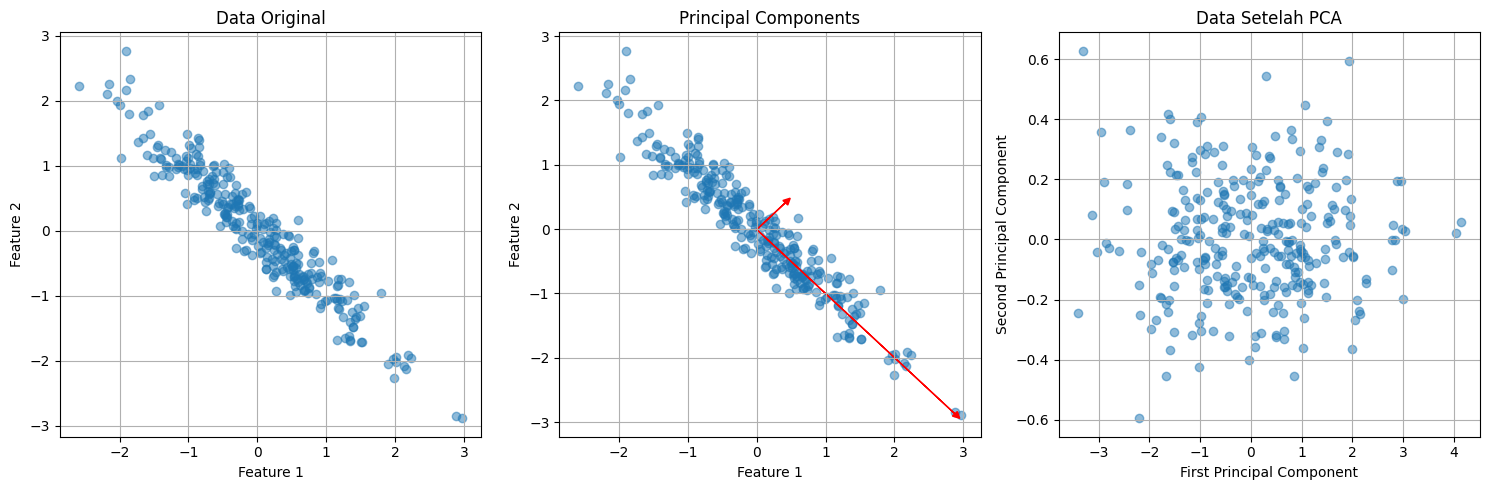


Explained Variance Ratio:
Principal Component 1: 0.979 (97.9%)
Principal Component 2: 0.021 (2.1%)


In [52]:
# Membuat data 2D yang berkorelasi
n_samples = 300
X = np.random.randn(n_samples, 2)
transformation = [[0.8, -0.6], [-0.6, 0.8]]
X_transformed = np.dot(X, transformation)

# Plot data original
plt.figure(figsize=(15, 5))

# Plot 1: Data Original
plt.subplot(131)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5)
plt.title('Data Original')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Lakukan PCA
pca = PCA()
X_pca = pca.fit_transform(X_transformed)

# Plot 2: Data dengan Principal Components
plt.subplot(132)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.arrow(pca.mean_[0], pca.mean_[1],
              v[0], v[1], head_width=0.1, head_length=0.1, color='r')
plt.title('Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Plot 3: Data yang sudah di-transform
plt.subplot(133)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Data Setelah PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print explained variance ratio
print("\nExplained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

## 2. Matematika di Balik PCA

PCA bekerja dengan beberapa konsep matematika penting:

### A. Covariance Matrix
- Mengukur hubungan antar fitur
- Matriks simetris
- Diagonal utama adalah variance

\[ Cov(X,Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1} \]

### B. Eigenvalues dan Eigenvectors
- Eigenvalues: mengukur variance di sepanjang principal component
- Eigenvectors: menentukan arah principal component
- Diurutkan dari terbesar ke terkecil

### C. Variance Explained
- Rasio eigenvalue terhadap total variance
- Mengukur kepentingan setiap principal component
- Membantu menentukan jumlah komponen yang dipertahankan

\[ Variance\\_Explained = \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j} \]

Mari kita visualisasikan konsep ini dengan contoh!

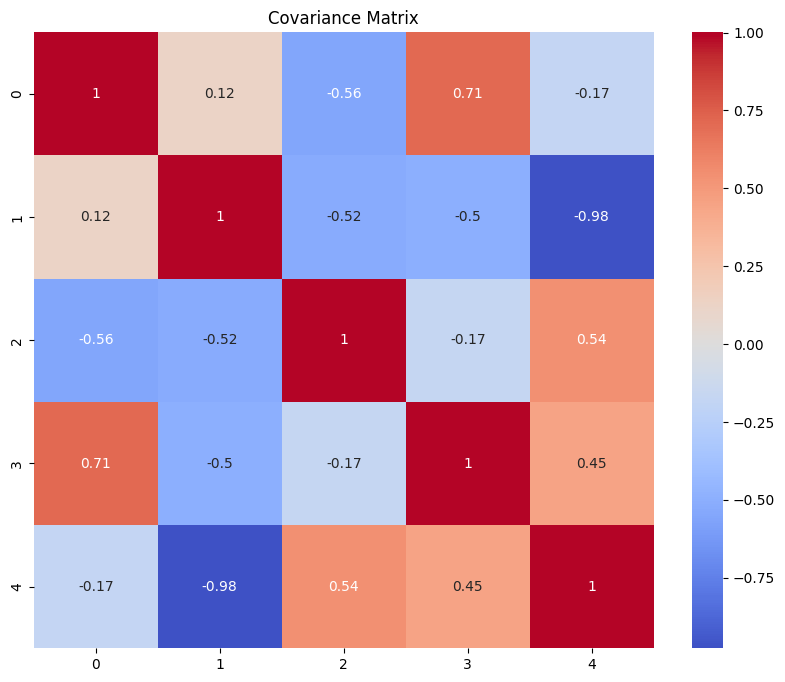

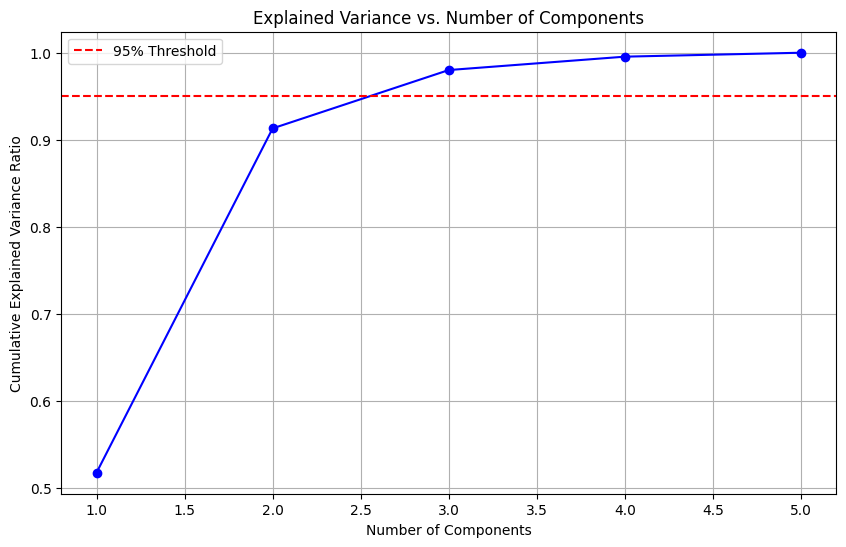


Detailed Variance Information:

Principal Component 1:
Explained Variance Ratio: 0.518 (51.8%)
Eigenvalue: 2.592
Cumulative Variance: 0.518 (51.8%)

Principal Component 2:
Explained Variance Ratio: 0.395 (39.5%)
Eigenvalue: 1.978
Cumulative Variance: 0.913 (91.3%)

Principal Component 3:
Explained Variance Ratio: 0.067 (6.7%)
Eigenvalue: 0.335
Cumulative Variance: 0.980 (98.0%)

Principal Component 4:
Explained Variance Ratio: 0.015 (1.5%)
Eigenvalue: 0.077
Cumulative Variance: 0.995 (99.5%)

Principal Component 5:
Explained Variance Ratio: 0.005 (0.5%)
Eigenvalue: 0.023
Cumulative Variance: 1.000 (100.0%)


In [53]:
# Membuat data multivariat
n_samples = 1000
n_features = 5
X_multi, _ = make_blobs(n_samples=n_samples, n_features=n_features, random_state=42)

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

# Hitung covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Visualisasi covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Covariance Matrix')
plt.show()

# Lakukan PCA
pca_multi = PCA()
X_pca_multi = pca_multi.fit_transform(X_scaled)

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca_multi.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.legend()
plt.show()

# Print detailed variance information
print("\nDetailed Variance Information:")
for i, (var_ratio, eigenval) in enumerate(zip(pca_multi.explained_variance_ratio_,
                                            pca_multi.explained_variance_)):
    print(f"\nPrincipal Component {i+1}:")
    print(f"Explained Variance Ratio: {var_ratio:.3f} ({var_ratio*100:.1f}%)")
    print(f"Eigenvalue: {eigenval:.3f}")
    print(f"Cumulative Variance: {cumulative_variance_ratio[i]:.3f} ({cumulative_variance_ratio[i]*100:.1f}%)")

## 3. Pemilihan Jumlah Principal Components

Ada beberapa metode untuk menentukan jumlah optimal principal components:

### A. Berdasarkan Explained Variance
1. **Threshold Method**:
   - Pilih jumlah komponen yang menjelaskan X% variance
   - Umumnya 80-95% variance
   - Trade-off antara dimensionality reduction dan information loss

2. **Elbow Method**:
   - Plot scree plot (eigenvalues vs. components)
   - Cari "siku" dalam plot
   - Point dimana penambahan komponen memberikan marginal return kecil

### B. Kaiser Criterion
- Pertahankan komponen dengan eigenvalue > 1
- Komponen ini menjelaskan lebih banyak variance dari variabel asli
- Rule of thumb yang populer

### C. Practical Considerations
1. **Tujuan Analisis**:
   - Visualisasi: 2-3 komponen
   - Machine Learning: berdasarkan performa model
   - Compression: trade-off ukuran vs kualitas

2. **Domain Knowledge**:
   - Kebutuhan interpretabilitas
   - Batasan komputasi
   - Requirements aplikasi

Mari kita implementasikan metode-metode ini!

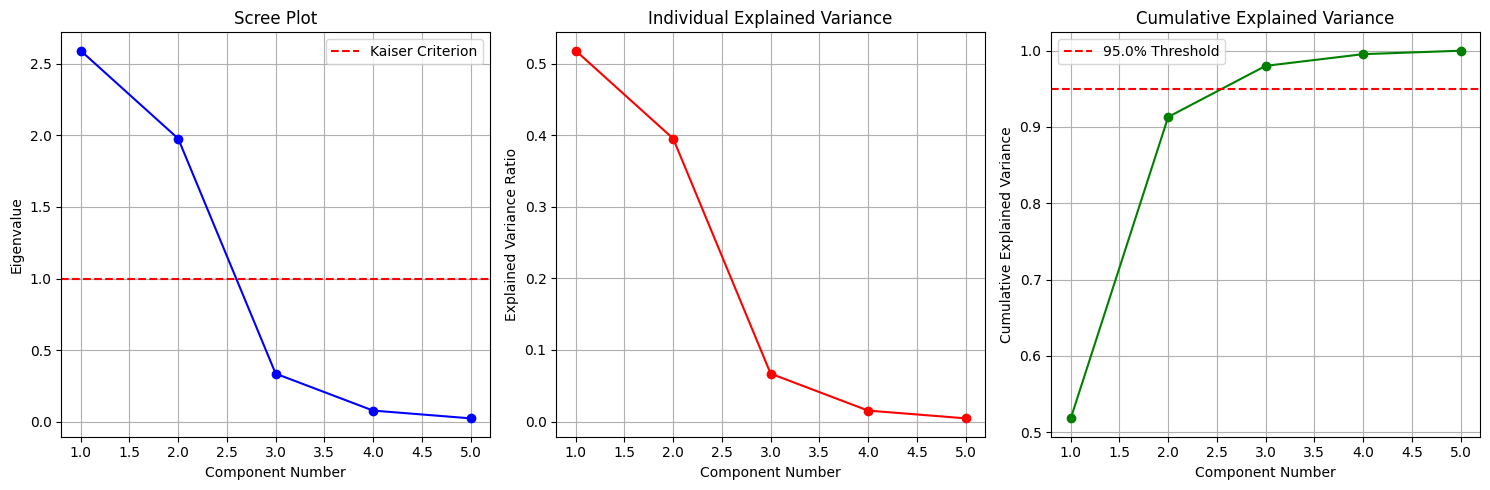


Rekomendasi Jumlah Komponen:
1. Kaiser Criterion (eigenvalue > 1): 2 komponen
2. Variance Threshold (95.0%): 3 komponen

Loadings (Korelasi variabel asli dengan principal components):
            PC1    PC2    PC3    PC4    PC5
Feature1 -0.153  0.656  0.428 -0.602 -0.017
Feature2 -0.603 -0.111  0.241  0.183  0.730
Feature3  0.432 -0.386  0.813  0.047  0.018
Feature4  0.247  0.635  0.127  0.716  0.079
Feature5  0.604  0.072 -0.284 -0.297  0.679


In [54]:
# Fungsi untuk membantu pemilihan jumlah komponen
def analyze_pca_components(X, threshold=0.95):
    # Fit PCA
    pca = PCA()
    pca.fit(X)
    
    # Plot 1: Scree Plot
    plt.figure(figsize=(15, 5))
    
    # Eigenvalues
    plt.subplot(131)
    plt.plot(range(1, len(pca.explained_variance_) + 1), 
             pca.explained_variance_, 'bo-')
    plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion')
    plt.xlabel('Component Number')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot')
    plt.legend()
    plt.grid(True)
    
    # Explained Variance Ratio
    plt.subplot(132)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_, 'ro-')
    plt.xlabel('Component Number')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Individual Explained Variance')
    plt.grid(True)
    
    # Cumulative Explained Variance
    plt.subplot(133)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumsum) + 1), cumsum, 'go-')
    plt.axhline(y=threshold, color='r', linestyle='--', 
                label=f'{threshold*100}% Threshold')
    plt.xlabel('Component Number')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Recommendations
    n_kaiser = sum(pca.explained_variance_ > 1)
    n_threshold = sum(cumsum < threshold) + 1
    
    print("\nRekomendasi Jumlah Komponen:")
    print(f"1. Kaiser Criterion (eigenvalue > 1): {n_kaiser} komponen")
    print(f"2. Variance Threshold ({threshold*100}%): {n_threshold} komponen")
    
    return pca

# Analisis komponen untuk data kita
pca_analysis = analyze_pca_components(X_scaled)

# Tampilkan loadings (korelasi antara variabel asli dan principal components)
loadings = pd.DataFrame(
    pca_analysis.components_.T,
    columns=[f'PC{i+1}' for i in range(pca_analysis.n_components_)],
    index=[f'Feature{i+1}' for i in range(X_scaled.shape[1])]
)

print("\nLoadings (Korelasi variabel asli dengan principal components):")
print(loadings.round(3))

## 4. Interpretasi dan Aplikasi PCA

### A. Interpretasi Hasil PCA

1. **Explained Variance**:
   - PC1 menjelaskan 51.8% variance
   - PC2 menjelaskan 39.5% variance
   - 2 komponen pertama menjelaskan 91.3% total variance

2. **Loadings**:
   - Menunjukkan kontribusi setiap fitur asli ke PC
   - Nilai absolut tinggi menunjukkan pengaruh kuat
   - Tanda menunjukkan arah hubungan

3. **Rekomendasi Komponen**:
   - Kaiser Criterion: 2 komponen
   - 95% Variance Threshold: 3 komponen
   - Trade-off antara dimensionality reduction dan information retention

### B. Aplikasi PCA

1. **Dimensionality Reduction**:
   - Preprocessing untuk machine learning
   - Mengurangi overfitting
   - Meningkatkan computational efficiency

2. **Feature Engineering**:
   - Menciptakan fitur baru yang uncorrelated
   - Menghilangkan multicollinearity
   - Input untuk algoritma lain

3. **Data Visualization**:
   - Visualisasi data high-dimensional
   - Eksplorasi patterns dan clusters
   - Deteksi outliers

### C. Best Practices

1. **Preprocessing**:
   - Selalu standardisasi data sebelum PCA
   - Handle missing values
   - Remove atau handle outliers

2. **Pemilihan Komponen**:
   - Gunakan multiple criteria
   - Pertimbangkan domain knowledge
   - Validasi dengan cross-validation

3. **Interpretasi**:
   - Fokus pada komponen dengan variance tinggi
   - Perhatikan loadings untuk interpretasi
   - Validasi hasil dengan domain experts

### D. Keterbatasan PCA

1. **Linearitas**:
   - Asumsi hubungan linear antar variabel
   - Tidak optimal untuk relasi non-linear
   - Consider kernel PCA untuk non-linearitas

2. **Interpretabilitas**:
   - Principal components bisa sulit diinterpretasi
   - Kehilangan makna fitur asli
   - Trade-off dengan dimensionality reduction

3. **Scaling Sensitivity**:
   - Sangat sensitif terhadap scaling
   - Perlu standardisasi yang tepat
   - Hasil bisa berbeda dengan scaling berbeda

## 5. Latihan

1. **Eksperimen dengan Data**:
   - Coba dataset dengan dimensi berbeda
   - Bandingkan hasil dengan scaling berbeda
   - Analisis pengaruh outliers

2. **Visualisasi**:
   - Buat biplot untuk interpretasi loadings
   - Visualisasi 3D dengan 3 principal components
   - Eksperimen dengan teknik visualisasi lain

3. **Aplikasi**:
   - Gunakan PCA untuk preprocessing
   - Kombinasikan dengan algoritma clustering
   - Bandingkan dengan teknik dimensionality reduction lain

## 6. Kesimpulan

PCA adalah teknik powerful untuk:
1. Mereduksi dimensi data
2. Mengekstrak fitur penting
3. Memvisualisasikan data kompleks

Poin Penting:
1. Preprocessing dan scaling sangat penting
2. Pemilihan jumlah komponen adalah trade-off
3. Interpretasi harus mempertimbangkan konteks

## 7. Referensi

1. Scikit-learn Documentation:
   - [PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca)
   - [Dimensionality Reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html)

2. Artikel dan Papers:
   - "A Tutorial on Principal Component Analysis" - Jonathon Shlens
   - "Principal Component Analysis: A Review and Recent Developments" - Ian Jolliffe

3. Additional Resources:
   - Python Data Science Handbook
   - Elements of Statistical Learning